# analyze relationship between GDT_TS and template quality (identity, positive, and coverage)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 100
sns.set(style='darkgrid')
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)

In [2]:
from pathlib import Path
dataset_name = 'scop_cl_equal_globular100_identity95_coverage60'
score_dir = Path('../../../../score/' + dataset_name)
plot_dir = score_dir / 'plot'
plot_dir.mkdir(exist_ok=True)
tmscore_path = score_dir / (dataset_name + '_final.csv')
df = pd.read_csv(tmscore_path, index_col=0)
df

,model,GDT_TS,GDT_HA,TMscore,target,template,seq_len,identity,positive,coverage,...,SF-PDBID,SF-PDBREG,SF-UNIID,SF-UNIREG,TP,CL,CF,SF,FA,Class
0,1AYZ_A_3OJ4_A_2_1,0.864,0.704,0.912,1AYZ_A,3OJ4_A_2,153,55,89,145,...,1AYZ,A:2-154,P06104,2-154,1,1000003,2000386,3000570,4001046,alpha + beta
1,1AYZ_A_4L83_A_3_3,0.858,0.678,0.907,1AYZ_A,4L83_A_3,153,50,82,150,...,1AYZ,A:2-154,P06104,2-154,1,1000003,2000386,3000570,4001046,alpha + beta
2,1AYZ_A_6TTU_D_1_5,0.851,0.678,0.898,1AYZ_A,6TTU_D_1,153,56,90,143,...,1AYZ,A:2-154,P06104,2-154,1,1000003,2000386,3000570,4001046,alpha + beta
3,1AYZ_A_4GPR_A_1_1,0.842,0.688,0.872,1AYZ_A,4GPR_A_1,153,55,89,139,...,1AYZ,A:2-154,P06104,2-154,1,1000003,2000386,3000570,4001046,alpha + beta
4,1AYZ_A_1TTE_A_3_5,0.657,0.423,0.787,1AYZ_A,1TTE_A_3,153,44,79,149,...,1AYZ,A:2-154,P06104,2-154,1,1000003,2000386,3000570,4001046,alpha + beta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14620,6SPF_T_3PYO_T_2_1,0.862,0.707,0.853,6SPF_T,3PYO_T_2,94,42,56,88,...,6SPF,T:1-94,E2RXT1,1-94,1,1000003,2000195,3000210,4000943,alpha + beta
14621,6SPF_T_3J7Y_U_3_1,0.614,0.444,0.598,6SPF_T,3J7Y_U_3,94,27,46,92,...,6SPF,T:1-94,E2RXT1,1-94,1,1000003,2000195,3000210,4000943,alpha + beta
14622,6SPF_T_1PNU_R_2_4,0.790,0.590,0.775,6SPF_T,1PNU_R_2,94,37,54,87,...,6SPF,T:1-94,E2RXT1,1-94,1,1000003,2000195,3000210,4000943,alpha + beta
14623,6SPF_T_5O60_U_3_4,0.832,0.692,0.840,6SPF_T,5O60_U_3,94,36,49,87,...,6SPF,T:1-94,E2RXT1,1-94,1,1000003,2000195,3000210,4000943,alpha + beta


In [3]:
for c in ['identity(-misres)','positive(-misres)', 'coverage(-misres)', 'identity', 'positive', 'coverage']:
    df[c + '(%)'] = df[c] / df['seq_len']

## correlation

In [4]:
df[['GDT_TS', 'identity(%)', 'positive(%)', 'coverage(%)', 'identity(-misres)(%)','positive(-misres)(%)', 'coverage(-misres)(%)']].corr()['GDT_TS']

GDT_TS                 1.000
identity(%)            0.497
positive(%)            0.567
coverage(%)            0.477
identity(-misres)(%)   0.504
positive(-misres)(%)   0.577
coverage(-misres)(%)   0.485
Name: GDT_TS, dtype: float64

In [5]:
df[['target', 'GDT_TS', 'identity(%)', 'positive(%)', 'coverage(%)', 'identity(-misres)(%)','positive(-misres)(%)', 'coverage(-misres)(%)']].groupby('target').corr()['GDT_TS'].mean(level=1)

GDT_TS                 1.000
identity(%)            0.636
positive(%)            0.661
coverage(%)            0.438
identity(-misres)(%)   0.645
positive(-misres)(%)   0.673
coverage(-misres)(%)   0.453
Name: GDT_TS, dtype: float64

## Scatter plot between GDT_TS and template quality

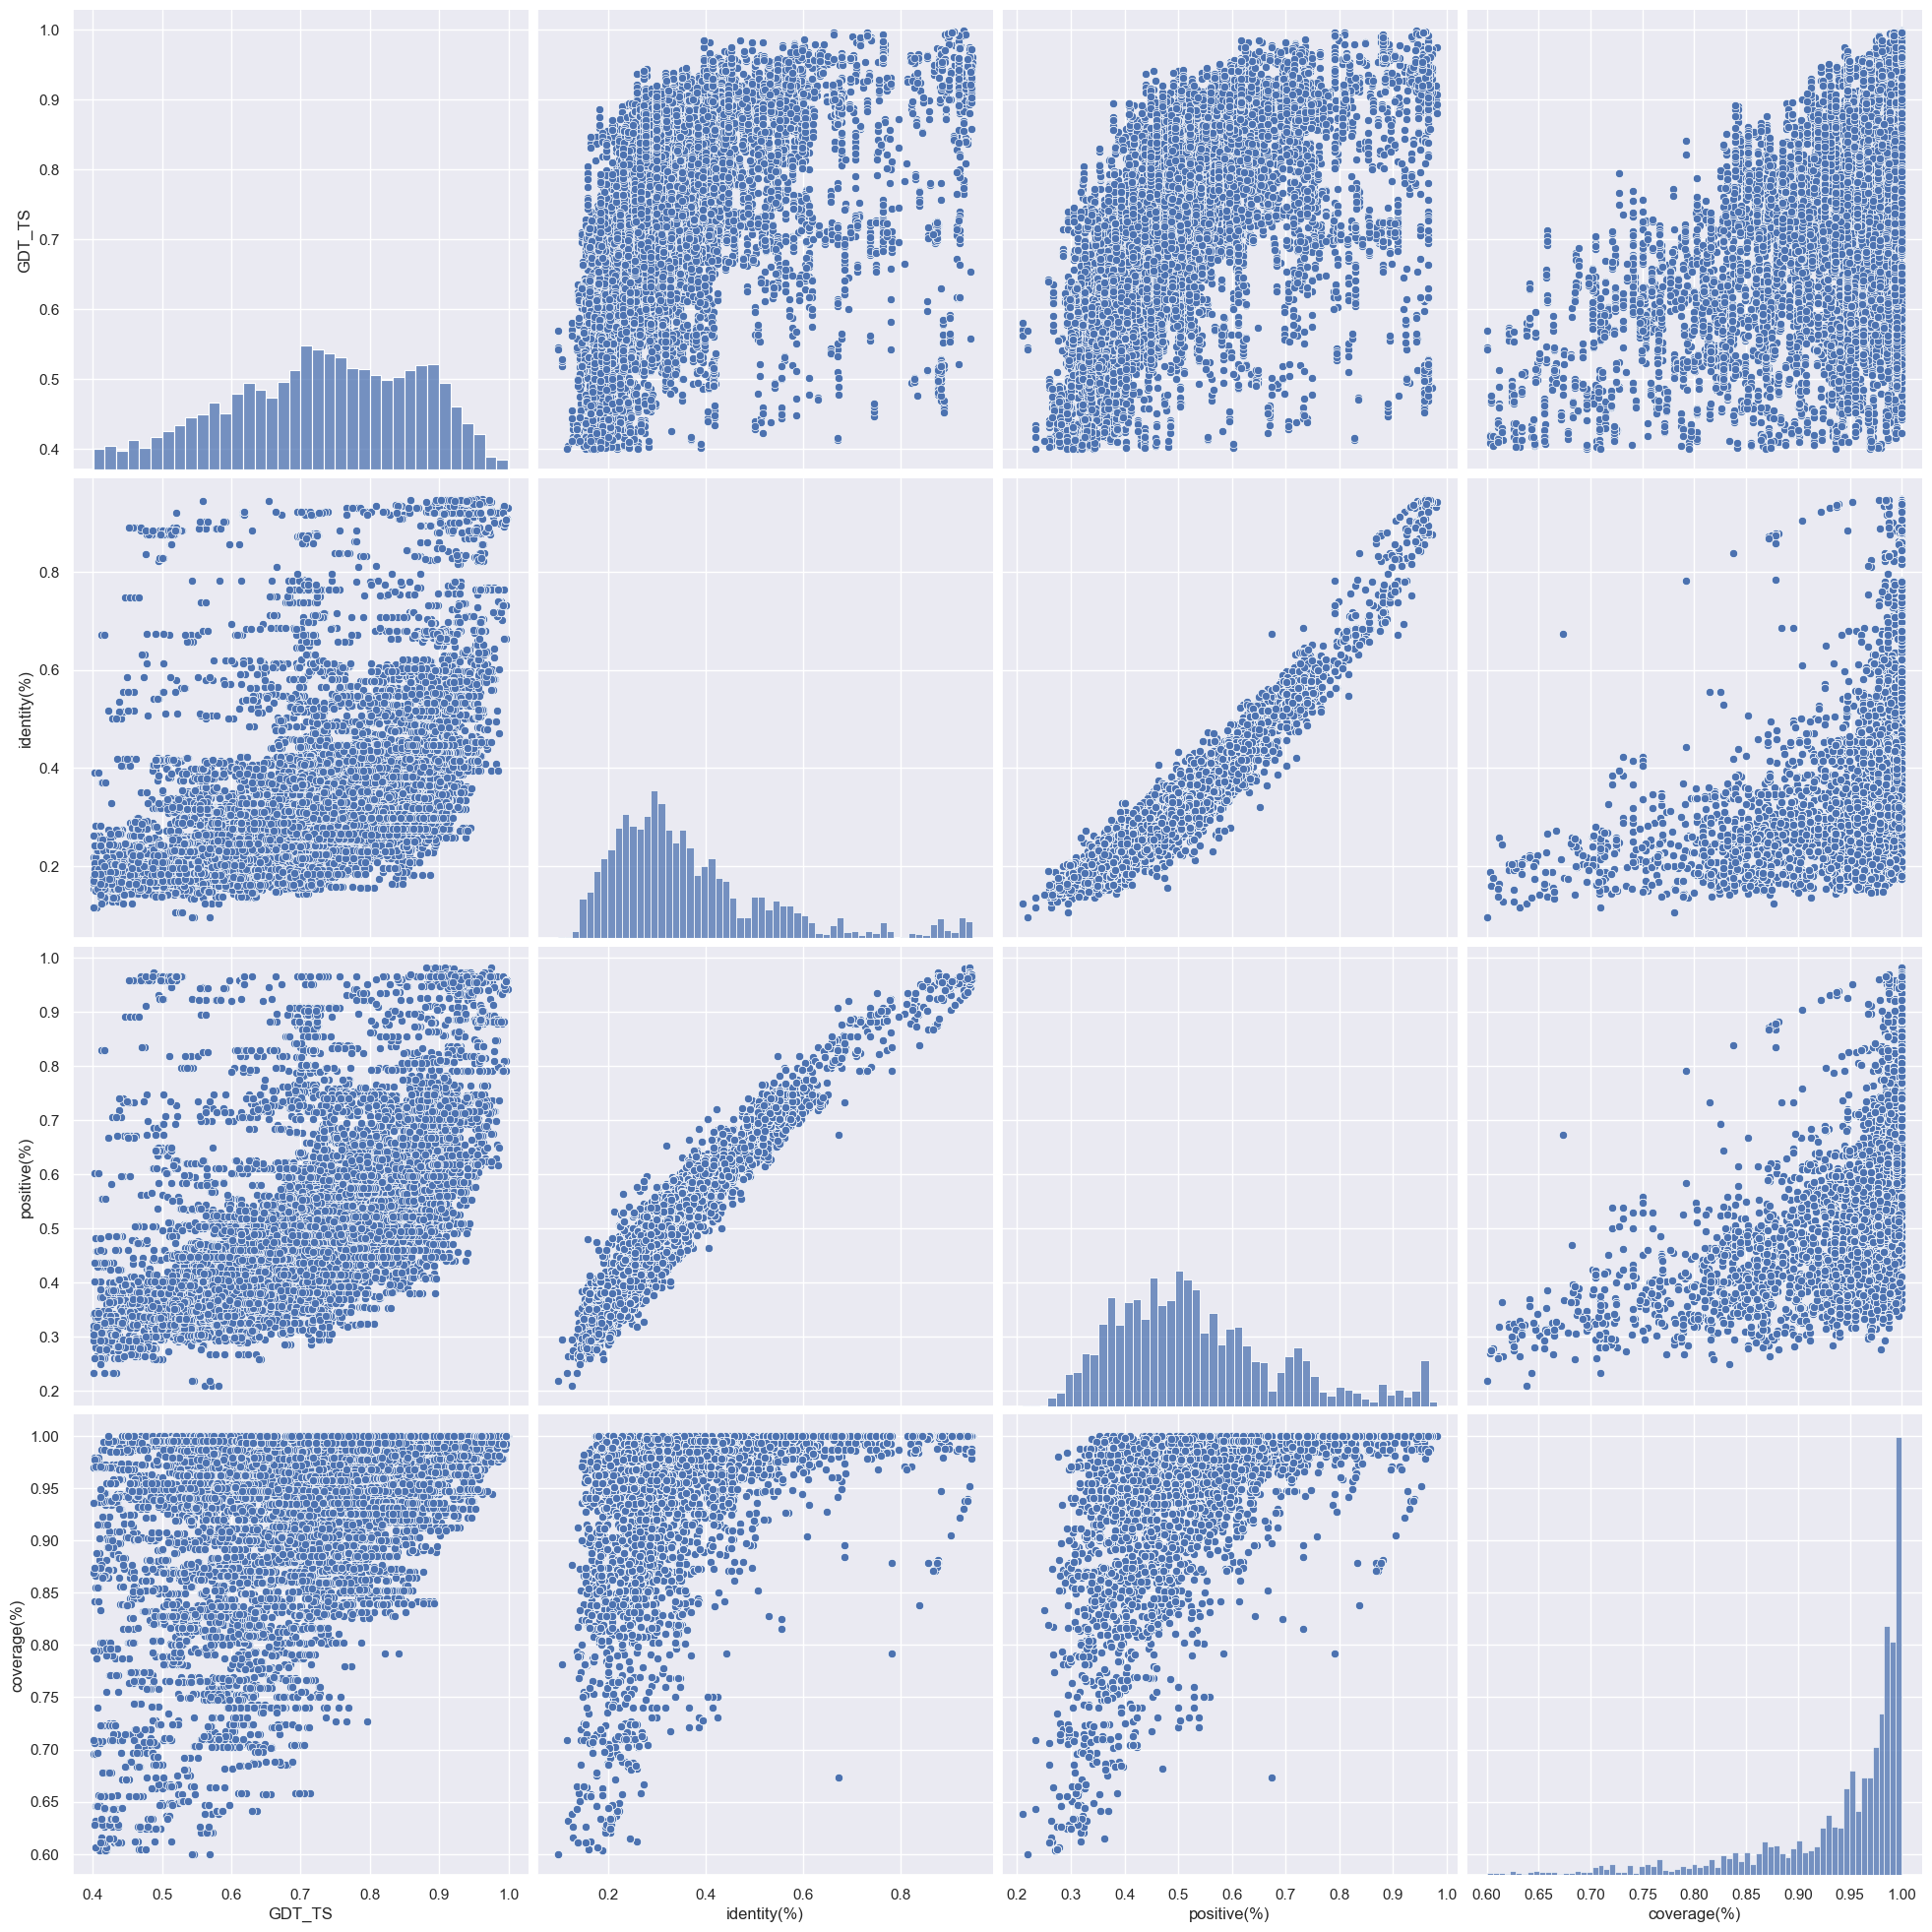

In [6]:
sns.pairplot(df[['GDT_TS', 'identity(%)', 'positive(%)', 'coverage(%)']], size=5)

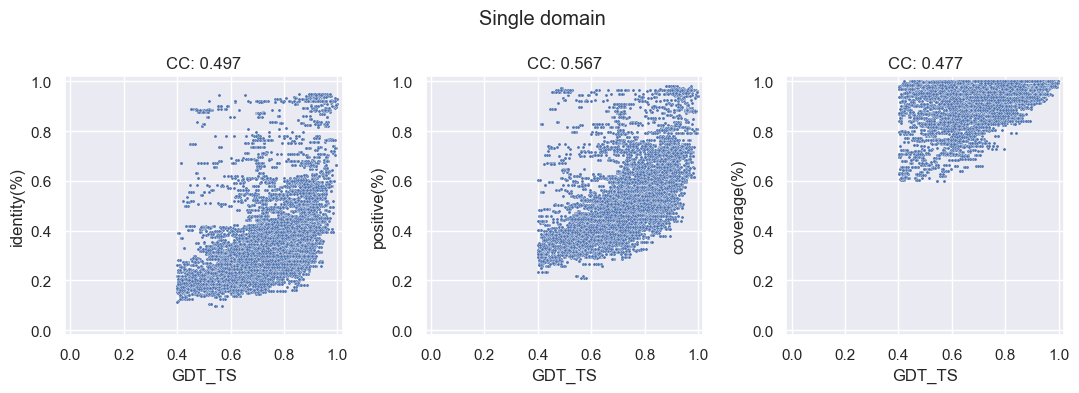

In [7]:
title = 'Single domain'
figsize = (11, 4)
label = 'GDT_TS'
columns = ['identity(%)', 'positive(%)', 'coverage(%)']
size = 5
lim = [-0.02, 1.02]
nclos = len(columns)
fig, axes = plt.subplots(nrows=1, ncols=nclos, sharex=False, sharey=False, figsize=figsize)
corr = df.corr()[[label] + columns]
for i, column in enumerate(columns):
    sns.scatterplot(data=df, x=label, y=column, s=size, ax=axes[i])
    axes[i].set_xlim(lim)
    axes[i].set_ylim(lim)
    axes[i].set_title('CC: {:.3f}'.format(corr[label][column]))
fig.suptitle(title)
plt.tight_layout()
plt.savefig(plot_dir / 'gdtts_template_quality_scatter.png')

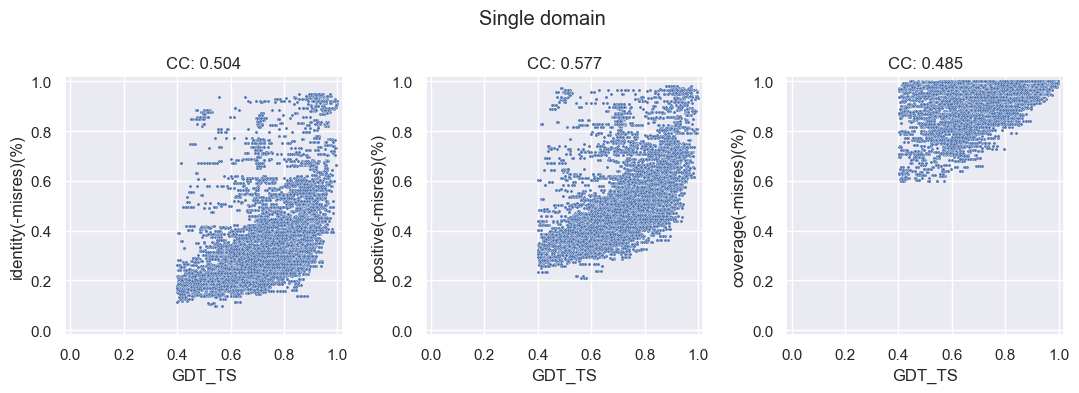

In [8]:
title = 'Single domain'
figsize = (11, 4)
label = 'GDT_TS'
columns = ['identity(-misres)(%)', 'positive(-misres)(%)', 'coverage(-misres)(%)']
size = 5
lim = [-0.02, 1.02]
nclos = len(columns)
fig, axes = plt.subplots(nrows=1, ncols=nclos, sharex=False, sharey=False, figsize=figsize)
corr = df.corr()[[label] + columns]
for i, column in enumerate(columns):
    sns.scatterplot(data=df, x=label, y=column, s=size, ax=axes[i])
    axes[i].set_xlim(lim)
    axes[i].set_ylim(lim)
    axes[i].set_title('CC: {:.3f}'.format(corr[label][column]))
fig.suptitle(title)
plt.tight_layout()
plt.savefig(plot_dir / 'gdtts_template_quality_considering_misres_scatter.png')